IMPORT LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score


LOAD DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/xai/SelectedFeatures-10s-TOR-NonTOR.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67834 entries, 0 to 67833
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source IP          67834 non-null  object 
 1    Source Port       67834 non-null  int64  
 2    Destination IP    67834 non-null  object 
 3    Destination Port  67834 non-null  int64  
 4    Protocol          67834 non-null  int64  
 5    Flow Duration     67834 non-null  int64  
 6    Flow Bytes/s      67832 non-null  float64
 7    Flow Packets/s    67834 non-null  float64
 8    Flow IAT Mean     67834 non-null  float64
 9    Flow IAT Std      67834 non-null  float64
 10   Flow IAT Max      67834 non-null  int64  
 11   Flow IAT Min      67834 non-null  int64  
 12  Fwd IAT Mean       67834 non-null  float64
 13   Fwd IAT Std       67834 non-null  float64
 14   Fwd IAT Max       67834 non-null  int64  
 15   Fwd IAT Min       67834 non-null  int64  
 16  Bwd IAT Mean       678

In [5]:
import pandas as pd

# Assuming your DataFrame is named df
nan_rows = data[data.isnull().any(axis=1)]

# To get the count of rows with NaN values
count_nan_rows = nan_rows.shape[0]

print(f"Number of rows with NaN values: {count_nan_rows}")


Number of rows with NaN values: 2


In [6]:
# To identify which columns have NaN values
columns_with_nan = data.columns[data.isnull().any()].tolist()
print(f"Columns with NaN values: {columns_with_nan}")

Columns with NaN values: [' Flow Bytes/s']


DATA PREPARATION AND PREPROCESSING

In [7]:
data.shape

(67834, 29)

In [8]:
data['label'].value_counts()

nonTOR    59790
TOR        8044
Name: label, dtype: int64

In [9]:
data['label'].unique()

array(['nonTOR', 'TOR'], dtype=object)

In [10]:
#dropping source IP and destination IP columns
data = data.drop(['Source IP'],axis=1)

In [11]:
data = data.drop([' Destination IP'],axis=1)


In [12]:
#label encoding categorical variable
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)
data.label

0        1
1        1
2        1
3        1
4        1
        ..
67829    1
67830    1
67831    1
67832    1
67833    1
Name: label, Length: 67834, dtype: int64

In [13]:
data['label'].value_counts()

1    59790
0     8044
Name: label, dtype: int64

In [14]:
# Replace infinity values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with class-wise means
class_column = 'label'

# Calculate class-wise means
class_means = data.groupby(class_column).transform(lambda x: x.fillna(x.mean()))

# Fill NaN values with class-wise means
data = data.fillna(class_means)

In [15]:
#split the dataset into independent and dependent variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [16]:
X.head()


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53913,80,6,435,0.0,4597.701149,435.0,0.0,435,435,...,0,0,0,0,0,0,0,0,0,0
1,53913,80,6,259,0.0,7722.007722,259.0,0.0,259,259,...,0,0,0,0,0,0,0,0,0,0
2,53913,80,6,891,0.0,2244.668911,891.0,0.0,891,891,...,0,0,0,0,0,0,0,0,0,0
3,53913,80,6,1074,0.0,1862.197393,1074.0,0.0,1074,1074,...,0,0,0,0,0,0,0,0,0,0
4,53913,80,6,315,0.0,6349.206349,315.0,0.0,315,315,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [18]:
type(X_train)

pandas.core.frame.DataFrame

In [19]:
X_train.shape

(50875, 26)

# **MODEL USED: DECISION TREE**

MODEL TRAINING  

In [19]:
classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=3,min_samples_leaf=2,random_state=10)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3, random_state=10)

MODEL TESTING

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

MODEL EVALUATION

In [21]:
#MAKING THE CONFUSION MATRIX

clf_rpt = classification_report(y_test,y_pred)
print("classification report: \n", clf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1995
           1       0.99      0.99      0.99     14964

    accuracy                           0.99     16959
   macro avg       0.97      0.98      0.97     16959
weighted avg       0.99      0.99      0.99     16959

Accuracy Score : 0.9892682351553748


In [22]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9892937118876516

<Axes: >

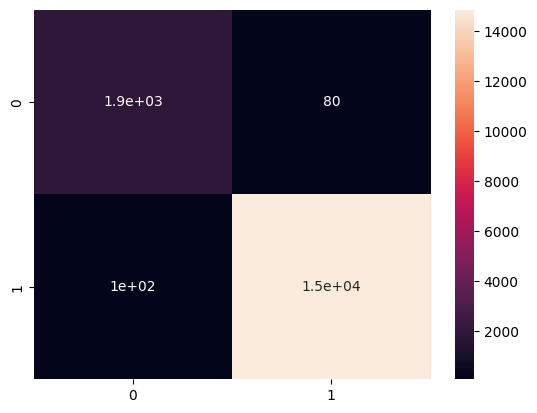

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

DISPLAYING TREE

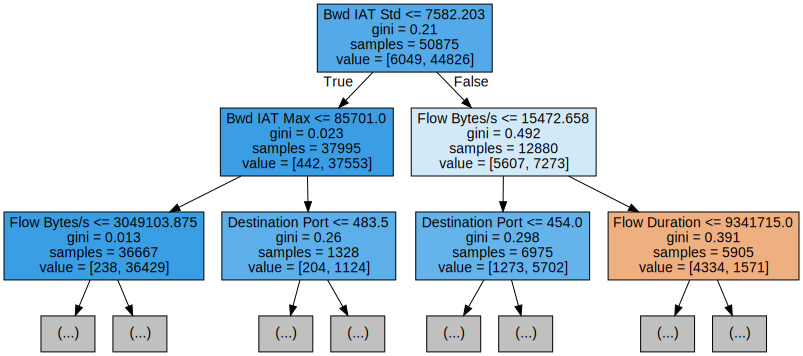

In [24]:
from sklearn import tree
import graphviz
tree_graph = tree.export_graphviz(classifier,out_file=None ,feature_names=X.columns,filled=True,max_depth=2)
graphviz.Source(tree_graph)


# **MODEL USED: RANDOM FOREST**

MODEL TRAINING

In [25]:
model_rf = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=4,random_state=10)

model_rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=4, random_state=10)

MODEL TESTING

In [26]:
rf_prediction = model_rf.predict(X_test)
rf_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
# compute prediction probabilities for sample 'x'
predict_rf = lambda x: model_rf.predict_proba(x).astype(float)

MODEL EVALUATION

In [28]:
rf_rpt = classification_report(y_test,rf_prediction)
print("classification report: \n", rf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,rf_prediction))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1995
           1       0.99      1.00      1.00     14964

    accuracy                           0.99     16959
   macro avg       0.99      0.98      0.98     16959
weighted avg       0.99      0.99      0.99     16959

Accuracy Score : 0.9937496314641193


In [29]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,rf_prediction, average='weighted')
f1_weighted

0.9937165817682566

<Axes: >

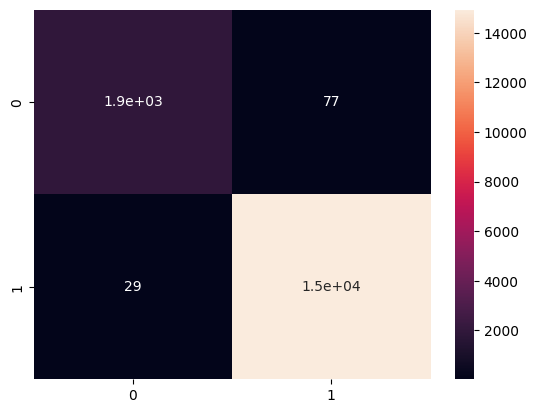

In [30]:
rf_cm = confusion_matrix(y_test, rf_prediction)
sns.heatmap(rf_cm, annot = True)

# **MODEL USED: SVM**

In [77]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_n = sc.fit_transform(X_train)
X_test_n = sc.transform(X_test)

In [78]:
from sklearn.svm import SVC

MODEL TRAINING

In [102]:
svc_model = SVC(probability = True, kernel='linear', gamma= 1)
svc_model.fit(X_train_n, y_train)

SVC(gamma=1, kernel='linear', probability=True)

MODEL TESTING

In [103]:
y_pred = svc_model.predict(X_test_n)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [104]:
# compute prediction probabilities for sample 'x'
predict_svc = lambda x: svc_model.predict_proba(X_test)

In [105]:
type(predict_svc)

function

MODEL EVALUATION

In [106]:
#MAKING THE CONFUSION MATRIX

clf_rpt = classification_report(y_test,y_pred)
print("classification report: \n", clf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73      1995
           1       0.96      0.98      0.97     14964

    accuracy                           0.94     16959
   macro avg       0.87      0.83      0.85     16959
weighted avg       0.94      0.94      0.94     16959

Accuracy Score : 0.9405625331682292


In [107]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9386255984858042

<Axes: >

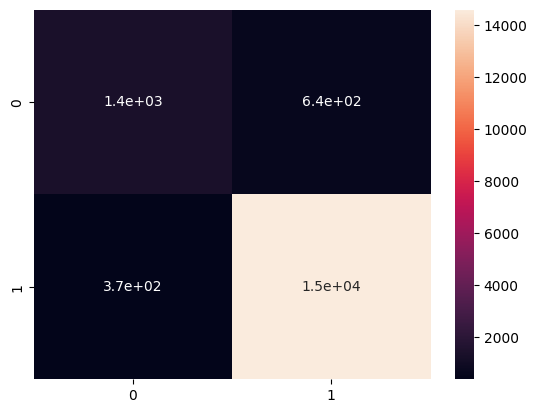

In [108]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# MODEL USED: XGBOOST

MODEL TRAINING

In [31]:
from xgboost import XGBClassifier

In [32]:
xgb = XGBClassifier(max_depth=7,min_child_weight=2,reg_lambda =1,random_state=10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

MODEL TESTING

In [33]:
y_pred=xgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
predict_xgb = lambda x: xgb.predict_proba(x).astype(float)

MODEL EVALUATION

In [35]:
#MAKING THE CONFUSION MATRIX

clf_rpt = classification_report(y_test,y_pred)
print("classification report: \n", clf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      0.99      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.9980541305501504


In [36]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9980526481583378

<Axes: >

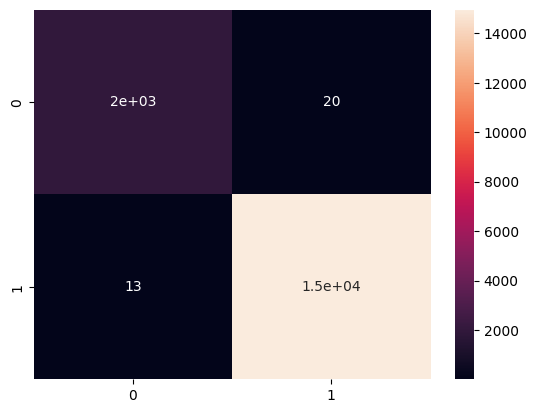

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# **MODEL USED: Multi-Layer Perceptron**

Model Training

In [64]:
from sklearn.neural_network import MLPClassifier

In [71]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=200,activation = 'relu',solver='adam',random_state=10)

In [72]:
mlp.fit(X_train_n, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=10)

Model Prediction

In [73]:
#Predicting y for X_val
y_pred = mlp.predict(X_test_n)

Model Evaluation

In [74]:
#MAKING THE CONFUSION MATRIX

mlp_rpt = classification_report(y_test,y_pred)
print("classification report: \n", mlp_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1995
           1       0.99      0.99      0.99     14964

    accuracy                           0.99     16959
   macro avg       0.97      0.97      0.97     16959
weighted avg       0.99      0.99      0.99     16959

Accuracy Score : 0.9875582286691432


In [75]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9875730445092716

<Axes: >

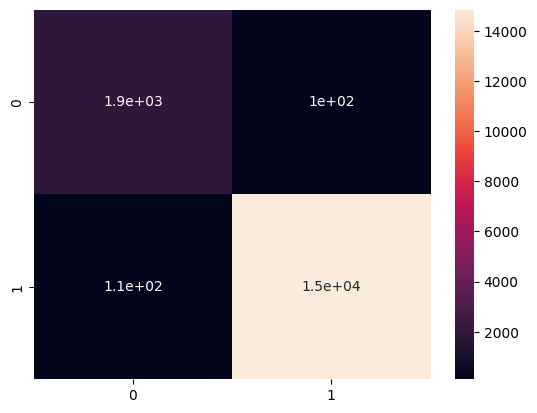

In [76]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# **MODEL USED : LIGHT GRADIENT BOOST (LGB)**

In [20]:
from lightgbm import LGBMClassifier

In [21]:
lgb = LGBMClassifier(num_iterations=300,tree_learner='serial',random_state=10)
lgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5855
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(num_iterations=300, random_state=10, tree_learner='serial')

In [22]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [24]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      1.00      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.9988796509228138


In [25]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9988792855686233

<Axes: >

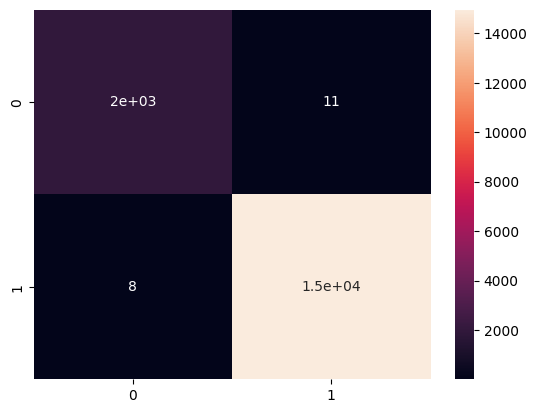

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

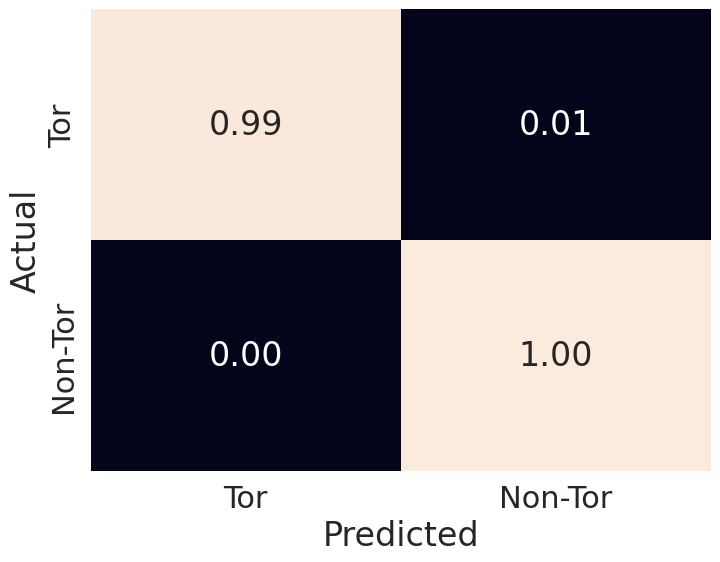

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


MODEL INTERPRETATION USING PERMUTATION IMPORTANCE

In [28]:
!pip install eli5

In [29]:
import eli5 as eli
from eli5.sklearn import PermutationImportance

In [30]:
eli.show_weights(lgb, feature_names=X.columns.tolist())

Weight,Feature
0.2188,Bwd IAT Std
0.2054,Bwd IAT Max
0.1830,Flow Bytes/s
0.0902,Destination Port
0.0615,Source Port
0.0578,Flow Duration
0.0487,Protocol
0.0355,Bwd IAT Min
0.0290,Flow IAT Min
0.0212,Fwd IAT Min


In [122]:
# Imporatant features from Test data
perm = PermutationImportance(lgb).fit(X_test,y_test)

In [ ]:
eli.show_weights(perm,feature_names=X.columns.tolist())

Weight,Feature
0.0679 ± 0.0011,Protocol
0.0673 ± 0.0019,Flow Bytes/s
0.0474 ± 0.0024,Destination Port
0.0406 ± 0.0016,Flow Duration
0.0237 ± 0.0006,Source Port
0.0059 ± 0.0005,Flow IAT Min
0.0017 ± 0.0003,Fwd IAT Min
0.0017 ± 0.0003,Bwd IAT Min
0.0012 ± 0.0002,Bwd IAT Max
0.0007 ± 0.0002,Fwd IAT Std


MODEL INTERPRETATION USING SHAP

In [31]:
pip install shap==0.43.0

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


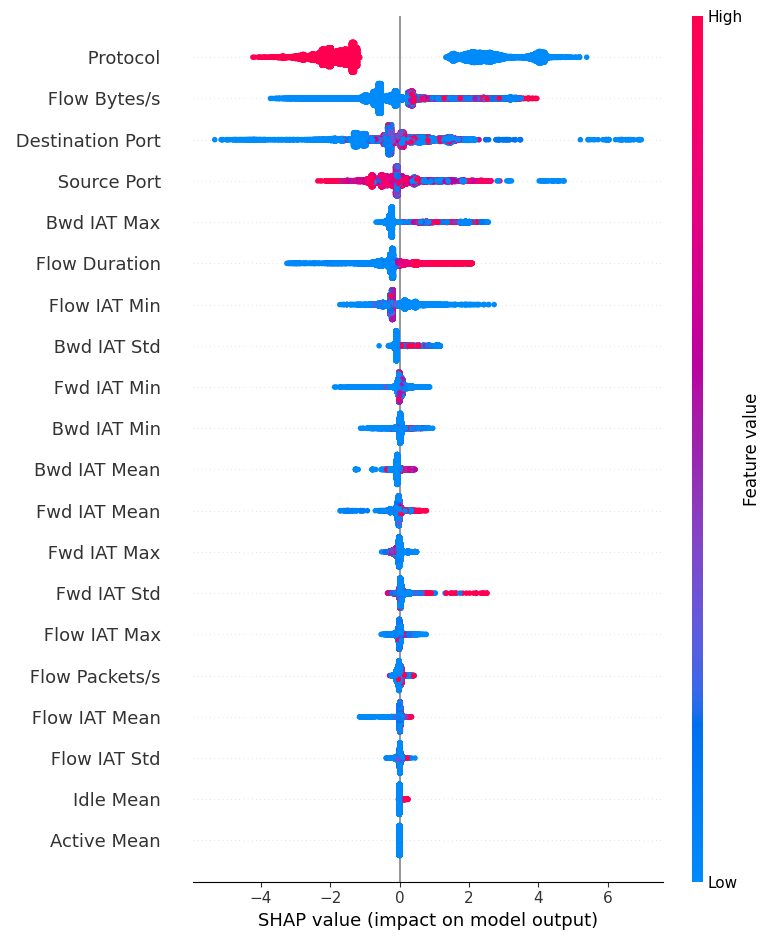

In [ ]:
import shap
shap.initjs()
#define a tree explainer for the model built
lgb_explainer_1 = shap.TreeExplainer(lgb)
shap_values = lgb_explainer_1.shap_values(X_test)
shap.summary_plot(shap_values[0],X_test,feature_names=X.columns)

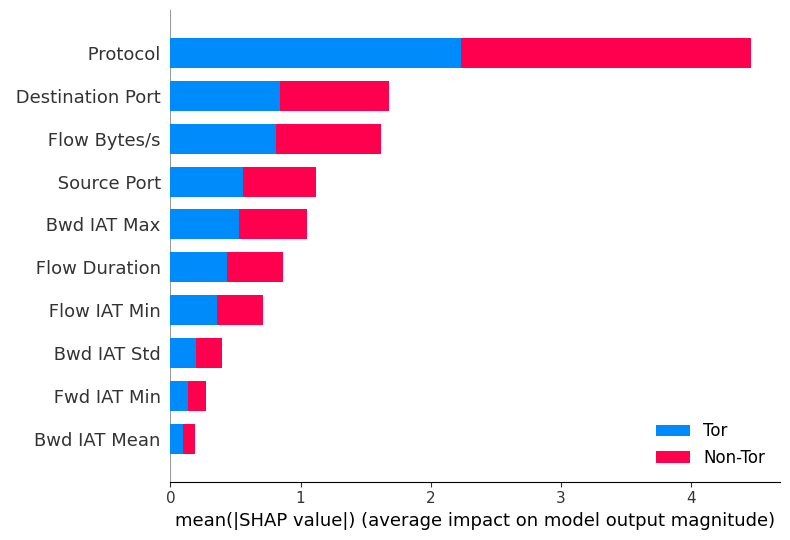

In [ ]:
shap.summary_plot(shap_values,X_test,class_names=['Tor', 'Non-Tor'],feature_names=X.columns,max_display=10,show=False)

[-15.427204376416283, 15.427204376416283]
[1]


<Figure size 640x480 with 0 Axes>

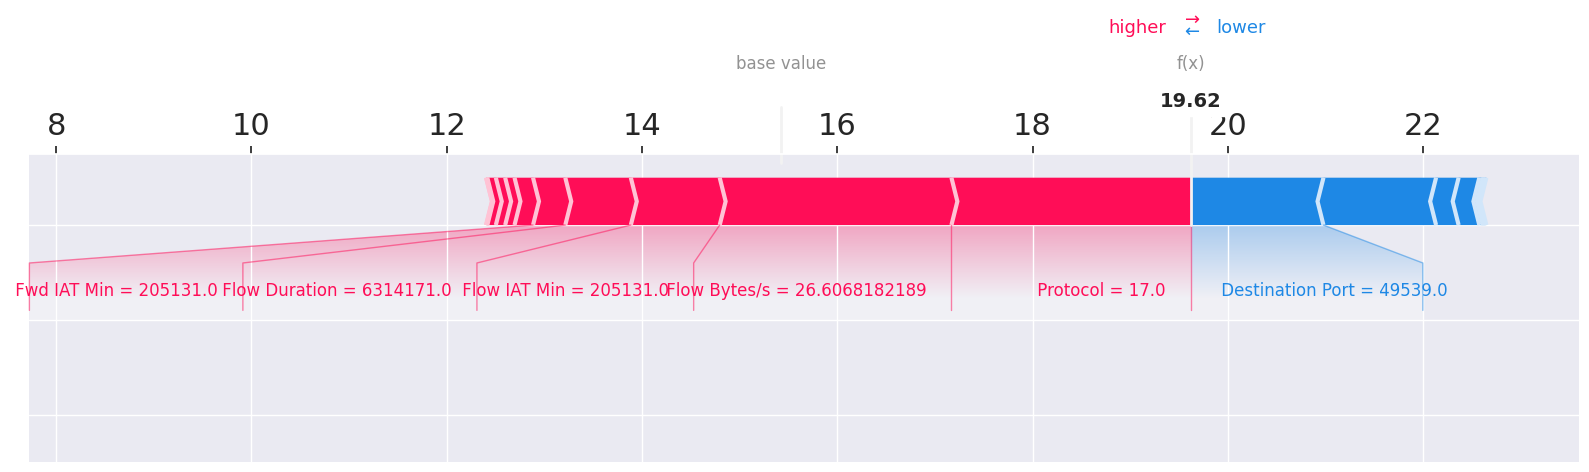

In [129]:
import shap
# JavaScript visualization initialization
shap.initjs()

print(lgb_explainer_1.expected_value)
instance = X_test.iloc[[5]]
# Print predicted values
print(lgb.predict(instance))

fig = plt.figure()
shap.force_plot(lgb_explainer_1.expected_value[1], shap_values[1][5],X_test.iloc[[5]],matplotlib=True, feature_names=X.columns, figsize=(20, 4))
# Increase overall font size for the plot
plt.rcParams.update({'font.size': 16})  # Adjust the base font size as needed

plt.show()

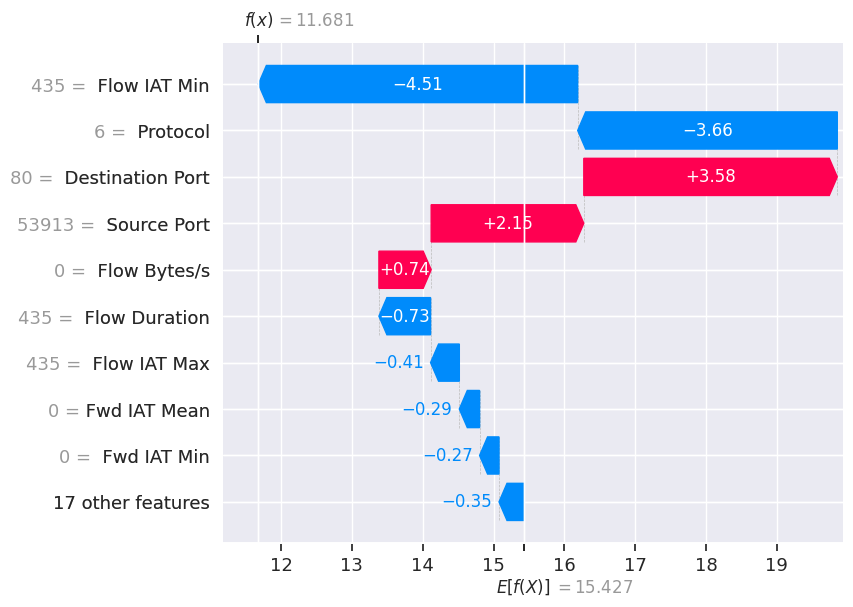

In [130]:
from shap import TreeExplainer, Explanation
explainer = TreeExplainer(lgb)
e = explainer(X)
exp = Explanation(e.values[:,:,1],
                  e.base_values[:,1],
                  data=X.values,
                  feature_names=X.columns)
idx = 0
shap.waterfall_plot(exp[idx])

MODEL INTERPRETATION USING LIME

In [33]:
!pip install lime

In [34]:
import lime
from lime import lime_tabular

In [35]:
X1 = X_train.values

In [36]:
chosen_instance =  X_test.iloc[5]

In [37]:
lgb_explainer_2 = lime.lime_tabular.LimeTabularExplainer(X1,feature_names=X.columns,class_names =['Tor','Non-Tor'])

In [38]:
exp = lgb_explainer_2.explain_instance(chosen_instance,predict_lgb,num_features=10)

In [39]:
exp.show_in_notebook(show_all=False)

COUNTERFACTUAL EXPLANATION

In [40]:
!pip install dice_ml

In [41]:
import seaborn as sns
import pandas as pd

In [42]:
data = pd.read_csv('/content/drive/MyDrive/xai/SelectedFeatures-10s-TOR-NonTOR.csv')

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data=data.dropna()

data = data.drop(['Source IP'],axis=1)
data = data.drop([' Destination IP'],axis=1)

encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)
data.label

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

train_dataset, test_dataset,y_train,y_test = train_test_split(data,y ,test_size=0.2, random_state=42,stratify=y)
x_train=train_dataset.drop("label",axis=1)
x_test=test_dataset.drop("label",axis=1)

In [43]:
train_dataset.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Active Mean', ' Active Std',
       ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max',
       ' Idle Min', 'label'],
      dtype='object')

In [44]:
#counterfactual explanation
import dice_ml
d= dice_ml.Data(dataframe=train_dataset,continuous_features=[' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Active Mean', ' Active Std',
       ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max',
       ' Idle Min'],outcome_name="label") # class label is mandatory in the dataset
m=dice_ml.Model(model=lgb,backend="sklearn")
exp =  dice_ml.Dice(d,m,method="random")

In [ ]:
e=exp.generate_counterfactuals(X_test[0:1],total_CFs=5,desired_class="opposite")# deciding which feature to vary
e.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

Query instance (original outcome : 1)


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,51761,443,6,1340456,18672.75,29.840591,34370.667969,80863.515625,231697,0,...,9,0,0,0,0,0,0,0,0,1



Diverse Counterfactual set (new outcome: 0.0)


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,-,-,-,9900045.0,18672.7501685993,29.8405915599,34370.7666666667,80863.5154495502,-,-,...,-,-,-,-,3073281.0,-,-,-,-,0.0
1,37213.0,-,-,-,18672.7501685993,29.8405915599,34370.7666666667,80863.5154495502,-,-,...,4977790.0,-,-,-,-,712184.0,-,-,-,0.0
2,37213.0,-,-,-,18672.7501685993,29.8405915599,34370.7666666667,80863.5154495502,-,-,...,4977790.0,-,-,-,-,712184.0,-,-,-,0.0
3,-,8319.0,-,-,18672.7501685993,29.8405915599,34370.7666666667,5676230.8,-,-,...,-,-,-,-,-,-,-,-,-,0.0
4,55953.0,-,-,7371817.0,18672.7501685993,29.8405915599,34370.7666666667,80863.5154495502,-,-,...,-,-,-,-,-,-,-,-,-,0.0


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *[' Source Port'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *[' Destination Port'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *[' Flow Duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *[' Flow IAT Std'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *[' Source Port', ' Destination Port'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_5, *[' Destination Port', ' Flow Duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *[' Flow Duration', ' Flow IAT Std'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_7, *[' Flow IAT Std', ' Fwd IAT Std'], **{})
chart